<h1 style="font-size:60px;" align="center">  RETINA DAMAGE DETECTION </h1>

Optical Coherence Tomography (OCT) is a non-invasive diagnostic technique that renders an in vivo cross sectional view of the retina. OCT utilizes a concept known as inferometry to create a cross-sectional map of the retina that is accurate to within at least 10-15 microns. OCT was first introduced in 1991 and has found many uses outside of ophthalmology, where it has been used to image certain non-transparent tissues. Due to the transparency of the eye (i.e. the retina can be viewed through the pupil), OCT has gained wide popularity as an ophthalmic diagnostic tool.

OCT is useful in the diagnosis of many retinal conditions, especially when the media is clear. In general, lesions in the macula are easier to image than lesions in the mid and far periphery. OCT can be particularly helpful in diagnosing:
- Macular hole
- Macular pucker
- Vitreomacular traction
- Macular edema
- Detachments of the neurosensory retina and retinal pigment epithelium (e.g. central serous retinopathy or age-related macular degeneration)

In some cases, OCT alone may yield the diagnosis (e.g. macular hole). Yet, in other disorders, especially retinal vascular disorders, it may be helpful to order additional tests (e.g. fluorescein angiogram).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
DATADIR= "F:/kermany2018/OCT2017/OCT2017/train/"

CATEGORIES = ['NORMAL','DRUSEN','CNV','DME']

C:\Users\santosh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


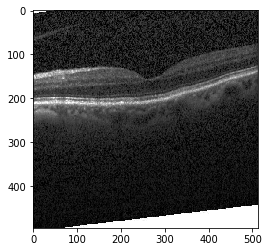

In [2]:

for category in CATEGORIES:
    path= os.path.join(DATADIR,category)
    for img in os.listdir(path):# iterate over each image
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            plt.imshow(img_array, cmap='gray')  # graph it
            plt.show()  # display!

            break 
    break

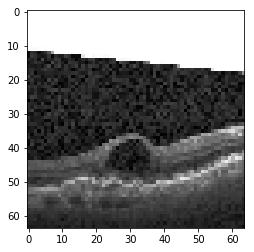

In [33]:
IMG_SIZE = 64
new_array=img_array
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


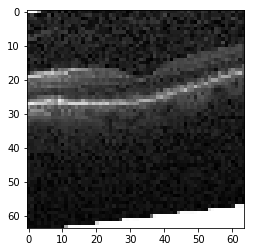

In [4]:
IMG_SIZE = 64
new_array=img_array
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


In [14]:
#DATADIR1= "F:/kermany2018/OCT2017/OCT2017/train/DRUSEN"

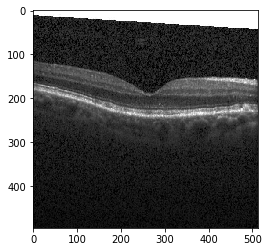

In [15]:
#path= os.path.join(DATADIR1)
for img in os.listdir(path):  # iterate over each image 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break 

In [10]:
img_array.shape

(496, 512)

### Training data

In [37]:
training_data = []

IMG_SIZE = 64

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path to files
        class_num = CATEGORIES.index(category)  # get the classification  (0 or 1 or 2 or 3).

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|███████████████████████████████████████████████████████████████████████████| 11348/11348 [00:45<00:00, 249.72it/s]


83484


In [38]:
import random
random.shuffle(training_data)

In [39]:
training_data[:2]

[[array([[28, 21, 30, ..., 11,  7,  2],
         [ 7,  7, 35, ...,  8,  1, 11],
         [23, 17, 10, ...,  6,  7, 14],
         ...,
         [ 5,  6,  1, ...,  0, 10,  6],
         [ 1,  0,  5, ...,  1,  5,  4],
         [ 5,  0,  2, ...,  7,  3,  5]], dtype=uint8), 2],
 [array([[ 38,  32,  44, ...,  22,  37,  35],
         [ 50,   8,  41, ...,  25,  49,  25],
         [ 23,  48,  29, ...,  22,  33,  29],
         ...,
         [ 18,   4,  24, ...,  22,  10,  11],
         [  7,  13,  10, ...,  10,  23,   9],
         [255, 255, 255, ...,  14,   4,   7]], dtype=uint8), 2]]

In [40]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)
    

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
import pickle


### CV Data

In [32]:
DATADIR= "F:/kermany2018/OCT2017/OCT2017/val"

CATEGORIES = ['NORMAL','DRUSEN','CNV','DME']

In [33]:
cv_data = []

def create_cv_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path
        class_num = CATEGORIES.index(category)  # get the classification  (0 to 3)

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                cv_data.append([img_array, class_num])  # add this to our training_data
                
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))

create_cv_data()

print(len(cv_data))

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 32.40it/s]


36


### test data

In [34]:
DATADIR= "F:/kermany2018/OCT2017/OCT2017/test"

CATEGORIES = ['NORMAL','DRUSEN','CNV','DME']

In [35]:
test_data = []

def create_test_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path
        class_num = CATEGORIES.index(category)  # get the classification  (0 to 3)

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                test_data.append([img_array, class_num])  # add this to our training_data
                
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))

create_test_data()

print(len(test_data))

100%|███████████████████████████████████████████████████████████████████████████████| 243/243 [00:01<00:00, 160.50it/s]


972


### Data Analysis

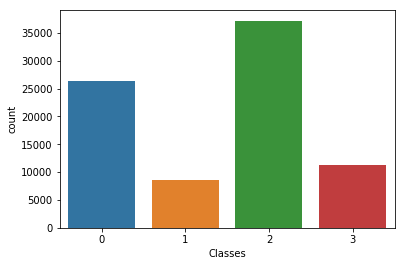

In [23]:
import seaborn as sns
sns.countplot(Y)
plt.xlabel("Classes")
plt.show()

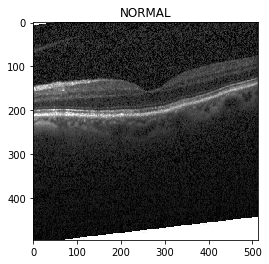

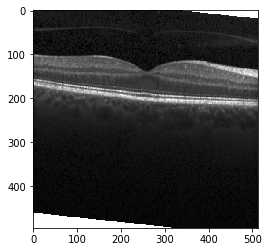

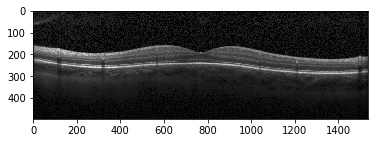

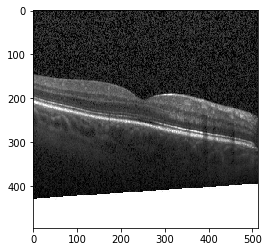

In [41]:
i=1
plt.title("NORMAL")
path= os.path.join(DATADIR,CATEGORIES[0])
for img in os.listdir(path):# iterate over each image
    if(i<5):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        i+=1

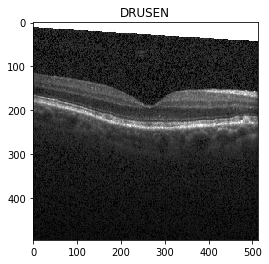

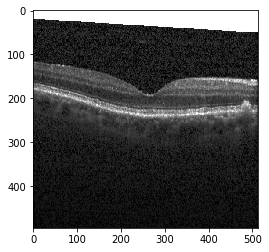

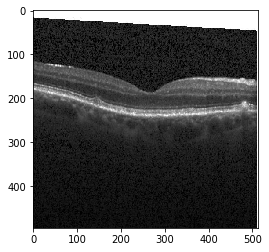

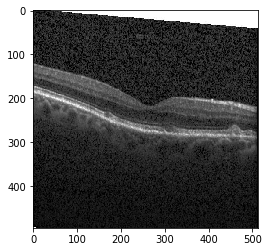

In [43]:
i=1
plt.title(CATEGORIES[1])
path= os.path.join(DATADIR,CATEGORIES[1])
for img in os.listdir(path):# iterate over each image
    if(i<5):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        i+=1

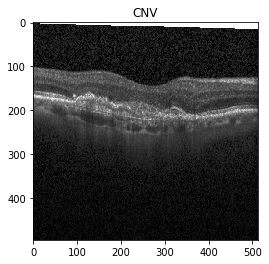

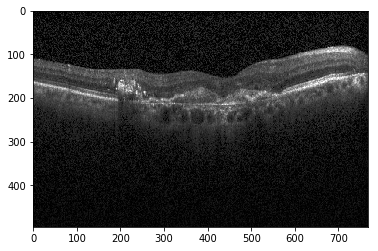

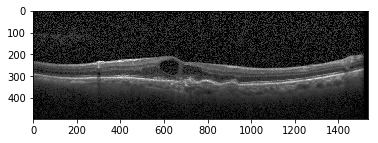

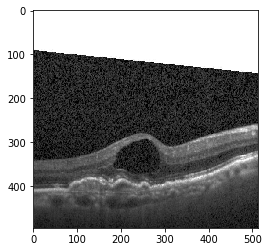

In [23]:
i=1
plt.title(CATEGORIES[2])
path= os.path.join(DATADIR,CATEGORIES[2])
for img in os.listdir(path):# iterate over each image
    if(i<5):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        i+=1

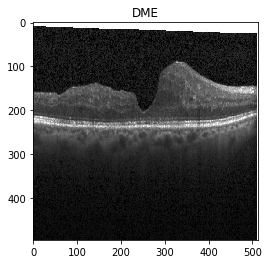

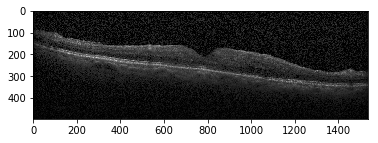

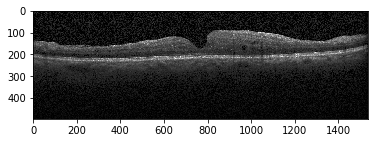

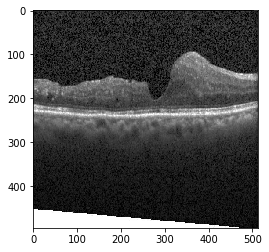

In [45]:
i=1
plt.title(CATEGORIES[3])
path= os.path.join(DATADIR,CATEGORIES[3])
for img in os.listdir(path):# iterate over each image
    if(i<5):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        i+=1

### Preparing data

In [6]:
import pickle
pickle_in=open("X1.pickle","rb")
X=pickle.load(pickle_in)
pickle_in=open("y.pickle","rb")
Y=pickle.load(pickle_in)

In [33]:
(x_train, y_train) = (X[:30000] ,Y[:30000])
(x_test, y_test) = (X[50000:57500], Y[50000:57500])

In [34]:
print("Test points",x_test.shape[0])
print("Train points",x_train.shape[0])

Test points 7500
Train points 30000


In [35]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [36]:
X.shape

(83484, 64, 64, 1)

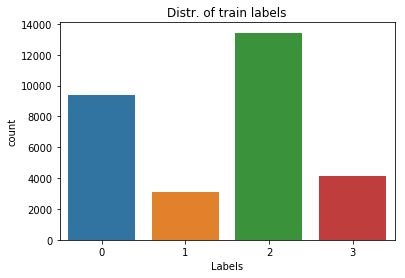

In [15]:
plt.title("Distr. of train labels")
sns.countplot(y_train)
plt.xlabel("Labels")
plt.show()

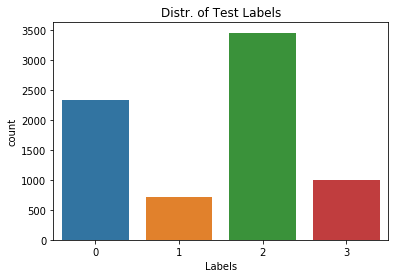

In [14]:
plt.title("Distr. of Test Labels")
sns.countplot(y_test)
plt.xlabel("Labels")
plt.show()

### Data Normalization and declaring useful variables

In [18]:
import keras
num_classes=4

In [37]:

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (30000, 64, 64, 1)
30000 train samples
7500 test samples


In [38]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

In [29]:
IMG_SIZE = 64
batch_size = 256
num_classes = 4
epochs = 10
input_shape = (IMG_SIZE,IMG_SIZE,1)

### model-1 3 x 3 kernel (2-conv -> 1-maxpool)

In [30]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten,Dense
model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',input_shape=input_shape))

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

In [31]:
from keras.optimizers import adam
from keras import metrics
model.compile( loss='categorical_crossentropy' , optimizer='adam' , metrics=["accuracy"])

In [ ]:
history= model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_test, y_test))

In [ ]:
pickle_out = open("Model1.pickle","wb")
out = pickle.dump(model,pickle_out)

In [53]:
score = model.evaluate(x_test, y_test, verbose=0)

In [59]:
# this function is used to update the plots for each epoch and error
import matplotlib.pyplot as plt
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()

Test score: 1.1604458021163941
Test accuracy: 0.4798


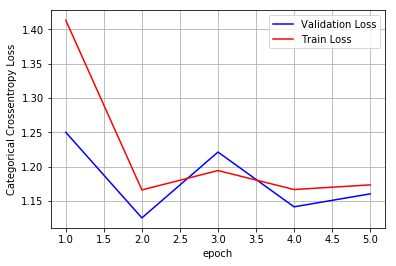

In [61]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show()

### vggnet-16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)